<a href="https://colab.research.google.com/github/laurentpayot/graia-colab-mnist/blob/main/Graia_MNIST_digits_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graia MNIST Digits Example

## OpenCL Setup

In [24]:
# !rm -rf sample_data
# !sudo apt update
# !sudo apt purge *nvidia* -y
# !sudo apt install nvidia-driver-530 -y
# !clinfo -l

graia.fut  graia.py  lib  Makefile  __pycache__


## Graia Setup

In [7]:
# !wget -O graia.py https://raw.githubusercontent.com/laurentpayot/graia/main/graia.py
# !wget -O graia.fut https://raw.githubusercontent.com/laurentpayot/graia/main/graia.fut
# !wget -O Makefile https://raw.githubusercontent.com/laurentpayot/graia/main/Makefile
# !wget -O futhark-nightly-linux-x86_64.tar.xz https://futhark-lang.org/releases/futhark-nightly-linux-x86_64.tar.xz
# !tar -xvf futhark-nightly-linux-x86_64.tar.xz
# !rm futhark-nightly-linux-x86_64.tar.xz
# !cd futhark-nightly-linux-x86_64 && make install
# !cd ..
# !rm -rf futhark-nightly-linux-x86_64
# !pip install futhark-ffi
# !make

--2024-07-05 12:44:47--  https://raw.githubusercontent.com/laurentpayot/graia/main/graia.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4209 (4.1K) [text/plain]
Saving to: ‘graia.py’

graia.py            100%[===================>]   4.11K  --.-KB/s    in 0s      

2024-07-05 12:44:48 (50.1 MB/s) - ‘graia.py’ saved [4209/4209]

--2024-07-05 12:44:48--  https://raw.githubusercontent.com/laurentpayot/graia/main/graia.fut
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6322 (6.2K) [text/plain]
Saving to: ‘graia.fut’

graia.fut    

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [9]:
from graia import Graia

🌄 Graia v0.0.1


In [12]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
N = 100
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [14]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, relu_boost=1, seed=123456)
# plt.imshow(model.hidden_weights[0], cmap="coolwarm")
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [15]:
model.fit(train_images, train_labels, epochs=1000)

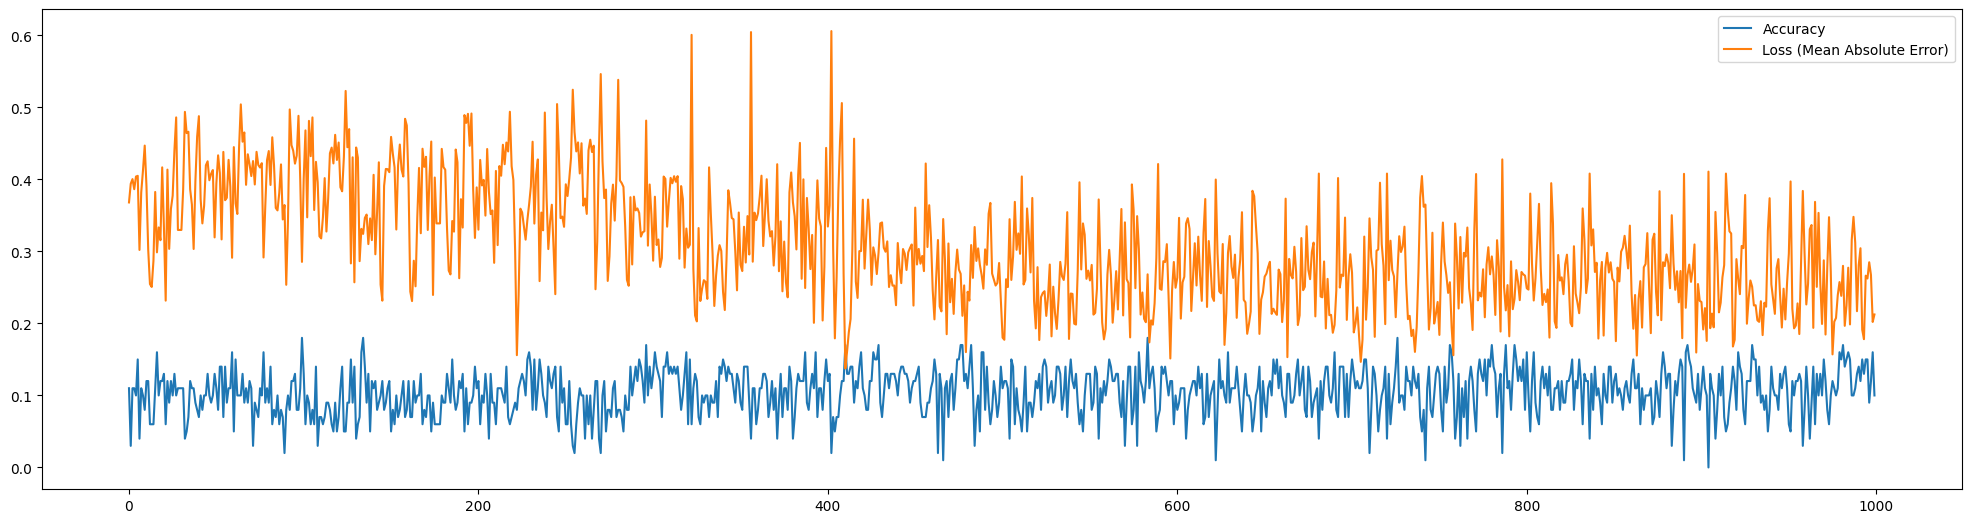

In [16]:
fig = plt.figure().add_axes([0,0,3,1])
fig.plot(model.history['accuracy'])
fig.plot(model.history['loss'])
plt.legend(["Accuracy", "Loss (Mean Absolute Error)"])
plt.show()

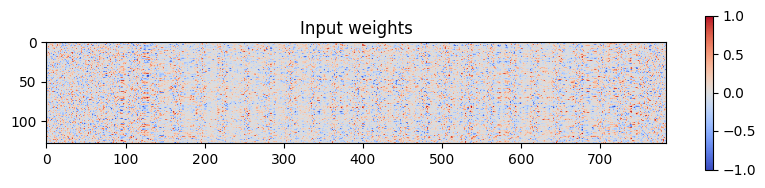

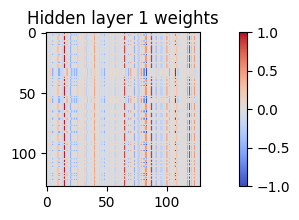

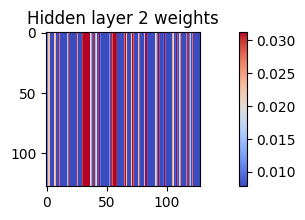

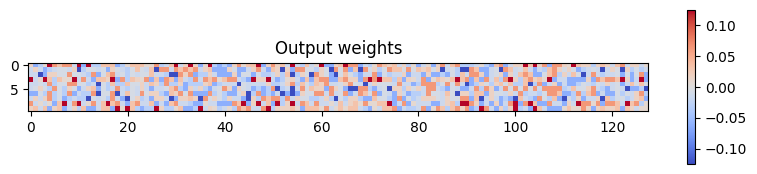

In [17]:
def normalize_weights(weights):
    # cannot use comparison conditions with numpy arrays
    return [(w / abs(w)) / 2 ** (abs(w) - 1) for w in weights]

def show_weights(weights, title=None):
    plt.figure(figsize = (10, 2))
    plt.imshow(normalize_weights(weights), cmap="coolwarm")
    plt.colorbar(orientation="vertical")
    plt.title(title)
    plt.show()

show_weights(model.input_weights, "Input weights")
for l in range(model.config["layers"] - 1):
    show_weights(model.hidden_weights[l], f"Hidden layer {l + 1} weights")
show_weights(model.output_weights, "Output weights")
# model.output_weights

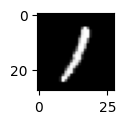

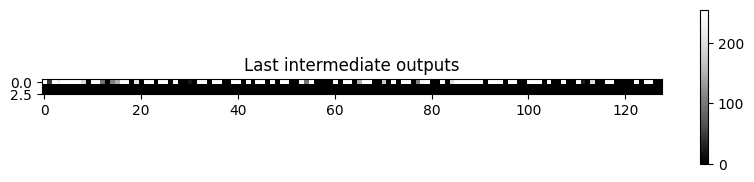

[0 0 0 0 0 0 0 0 0 0] --> 0


In [22]:
plt.figure(figsize = (1, 1))
plt.imshow(train_images[N-1].reshape(28, 28), cmap="Greys_r")
plt.show()
# for l in range(model.config["layers"]):
#     print(model.last_intermediate_outputs[l])
plt.figure(figsize = (10, 2))
plt.imshow(model.last_intermediate_outputs, cmap="Greys_r")
plt.colorbar(orientation="vertical")
plt.title("Last intermediate outputs")
plt.show()
print(model.last_outputs, "-->", model.last_answer)